In [2]:
import random
from math import *
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import datasets

In [3]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [4]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [5]:
df_training.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [7]:
# copy the predictor variables into X and responses in y
X_df = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y_df = df_training['class']

In [8]:
type(X_df)

pandas.core.frame.DataFrame

In [9]:
X = X_df.values
y = y_df.values

In [10]:
type(X)

numpy.ndarray

In [11]:
skf = KFold(n_splits=5, random_state=None)

# X is the feature set and y is the target
# for train_index, test_index in skf.split(X, y): 
#     #print("Train:", train_index, "Validation:", test_index) 
#     X_train, X_test = X[train_index], X[test_index] 
#     y_train, y_test = y[train_index], y[test_index]

In [10]:
#list(range(1, 30))

In [12]:
myList = list(range(1, 30))
print(myList)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [13]:
# creating odd list of K for KNN
myList = list(range(1, 30))

neighbors = []

# subsetting just the odd ones
for i in myList:
    if i % 2 != 0:
        neighbors.append(i)
        
neighbors


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [14]:
# neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform k-fold cross validation
for k_value in neighbors:
    
    # instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k_value)
    
    scores = cross_val_score(estimator=knn, 
                             X=X, 
                             y=y, 
                             cv=skf, 
                             scoring = 'accuracy' )    
    print('K = ', k_value, ' ', scores)
    
    cv_scores.append(scores.mean())

K =  1   [1.         1.         0.86666667 0.93333333 0.83333333]
K =  3   [1.         1.         0.83333333 0.93333333 0.76666667]
K =  5   [1.         1.         0.83333333 0.93333333 0.8       ]
K =  7   [1.         1.         0.83333333 0.96666667 0.8       ]
K =  9   [1.         1.         0.86666667 0.96666667 0.76666667]
K =  11   [1.         0.96666667 0.86666667 0.96666667 0.76666667]
K =  13   [1.         0.96666667 0.86666667 0.93333333 0.76666667]
K =  15   [1.         0.96666667 0.86666667 0.93333333 0.73333333]
K =  17   [1.         0.96666667 0.8        0.96666667 0.66666667]
K =  19   [1.         0.96666667 0.8        0.96666667 0.7       ]
K =  21   [1.         0.96666667 0.8        0.93333333 0.63333333]
K =  23   [1.         0.96666667 0.8        0.93333333 0.63333333]
K =  25   [1.         0.96666667 0.8        0.93333333 0.6       ]
K =  27   [1.         0.93333333 0.8        0.93333333 0.56666667]
K =  29   [1.         0.93333333 0.7        0.9        0.46666667]


In [15]:
cv_scores

[0.9266666666666665,
 0.9066666666666666,
 0.9133333333333333,
 0.9200000000000002,
 0.9200000000000002,
 0.9133333333333334,
 0.9066666666666666,
 0.9,
 0.8800000000000001,
 0.8866666666666667,
 0.8666666666666668,
 0.8666666666666668,
 0.86,
 0.8466666666666667,
 0.8]

In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
MSE

[0.07333333333333347,
 0.09333333333333338,
 0.08666666666666667,
 0.07999999999999985,
 0.07999999999999985,
 0.08666666666666656,
 0.09333333333333338,
 0.09999999999999998,
 0.11999999999999988,
 0.11333333333333329,
 0.1333333333333332,
 0.1333333333333332,
 0.14,
 0.15333333333333332,
 0.19999999999999996]

In [17]:
print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


The optimal number of neighbors is  1


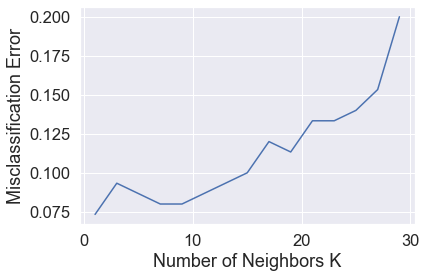

In [19]:
# determining best K
optimal_k = neighbors[MSE.index(min(MSE))]

print ("The optimal number of neighbors is ", optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()